In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv('./data/train.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null object
dropoff_datetime      1458644 non-null object
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [4]:
train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'],infer_datetime_format=True)
train['dropoff_datetime'] = pd.to_datetime(train['dropoff_datetime'],infer_datetime_format=True)
print(train['pickup_datetime'].min())
print(train['pickup_datetime'].max())
print(train['dropoff_datetime'].min())
print(train['dropoff_datetime'].max())

2016-01-01 00:00:17
2016-06-30 23:59:39
2016-01-01 00:03:31
2016-07-01 23:02:03


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null datetime64[ns]
dropoff_datetime      1458644 non-null datetime64[ns]
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
dtypes: datetime64[ns](2), float64(4), int64(3), object(2)
memory usage: 122.4+ MB


In [11]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [39]:
#y = latitude
#x = longitude
d = (train['dropoff_datetime'] - train['pickup_datetime'])
d[d > pd.Timedelta('0 days 10:00:00')].sort_values()
#train['pickup_longitude']
#train['pickup_longitude'][0]

73270      0 days 10:03:52
1335752    0 days 10:09:54
1160138    0 days 10:10:28
1141738    0 days 10:12:46
1295798    0 days 10:13:04
654476     0 days 10:15:49
1315061    0 days 10:19:38
29062      0 days 10:21:45
915816     0 days 10:23:54
1235683    0 days 10:30:56
126626     0 days 10:33:48
1074508    0 days 10:55:01
1228702    0 days 10:57:47
1130725    0 days 11:02:50
1314723    0 days 11:12:37
1114032    0 days 11:13:19
332296     0 days 11:29:16
31355      0 days 11:41:38
206542     0 days 11:59:37
52308      0 days 12:00:35
344266     0 days 12:01:49
928453     0 days 12:09:09
322991     0 days 12:10:39
427151     0 days 12:16:36
266781     0 days 12:26:23
280402     0 days 12:38:27
369579     0 days 12:48:39
186074     0 days 13:09:05
49346      0 days 13:25:04
1218724    0 days 13:34:15
                ...       
1099093    0 days 23:59:21
252615     0 days 23:59:22
1258361    0 days 23:59:22
556468     0 days 23:59:22
755015     0 days 23:59:22
1399707    0 days 23:59:23
3

In [101]:
#y = latitude
#x = longitude
#1 = 158.266197
def get_pixels(source):
    zero_dist = 0 - train[source].min()
    range = train[source].max() - train[source].min()
    return (train[source] + zero_dist) / range * 200

#add_pixels('pickup_longitude', 'pickup_x')
train['pickup_x'] = get_pixels('pickup_longitude')
train['pickup_y'] = get_pixels('pickup_latitude')
train['dropoff_x'] = get_pixels('dropoff_longitude')
train['dropoff_y'] = get_pixels('dropoff_latitude')

In [102]:
print(train['pickup_x'].min(), '-', train['pickup_x'].max())
print(train['pickup_y'].min(), '-', train['pickup_y'].max())
print(train['dropoff_x'].min(), '-', train['dropoff_x'].max())
print(train['dropoff_y'].min(), '-', train['dropoff_y'].max())
train.head()

0.0 - 200.0
0.0 - 200.0
0.0 - 200.0
0.0 - 200.0


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_x,pickup_y,dropoff_x,dropoff_y
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,158.260455,73.147640,158.318269,146.244355
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,158.266197,72.812356,158.203244,145.657458
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,158.270779,73.102007,158.183931,145.298600
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,158.168421,72.600126,158.161042,145.241217
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,158.290496,73.436114,158.290897,146.532573


[      2       0       0       0       0       0       0       0       0
       0       0       0       0       0       0       0       0       0
       0       0       0       0       0       0       0       0       0
       0       0       0       0       0       0       0       0       0
       0       0       0       0       0       0       0       0       0
       0       0       0       0       0       0       0       0       0
       0       0       0       0       0       0       0       0       0
       0       0       0       0       0       0       0       0       0
       0       0       0       0       0       0       0       0       0
       0       0       0       0       0       0       0       0       0
       0       0       0       0       0       0       0       0       0
       0       0       0       0       0       0       0       0       0
       0       0       0       0       0       0       0       0       0
       0       0       0       0       0       0   

(array([199.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([      0. ,  145795.2,  291590.4,  437385.6,  583180.8,  728976. ,
         874771.2, 1020566.4, 1166361.6, 1312156.8, 1457952. ]),
 <a list of 10 Patch objects>)

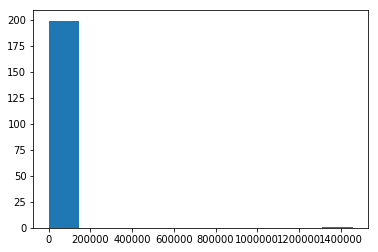

In [108]:
hist, _ = np.histogram(train['pickup_x'], bins=200)
print(hist)
plt.hist(hist)